# Analysis of the learning

In [316]:
import numpy as np
import pandas as pd
import plot_likert
import matplotlib.pyplot as plt

from scipy import stats
from pandas.api.types import CategoricalDtype

Define the path to files

In [317]:
pathTimeAR = "./Data/ARgroup-AllInd-2.xlsx"
pathTimeControl = "./Data/ControlGroup-AllInd.xlsx"

Read files

In [318]:
dataAR = pd.read_excel(pathTimeAR)
dataControl = pd.read_excel(pathTimeControl)
dataAll = pd.concat([dataAR, dataControl])

Encode Likert scale for inferential stats

In [319]:
# arExperienceScalet = {'Never':0,'Rarely':1,'Sometimes':2,'Moderately':3,'Regularly':4,'VeryRegularly':5}
# machineryExpScale = ['None','Very Little','Little','Moderately Familiar','Familiar','Very Familiar']

utilityScale = {'Useless':1, 'Scarcely useful':2, 'Moderately useful':3, 'Almost useful':4, 'Useful':5}
reprodAloneScale = {'Unable':1, 'Barely able':2, 'Moderately able':3, 'Almost able':4, 'Completely able':5}
clarityScale = {'Not at all clear':1, 'Not much clear':2, 'Understandable':3, 'Very clear':4, 'Limpid':5}
explicaNeedScale = {'Never':1, 'Rarely':2, 'Sometimes':3, 'Often':4, 'Always':5}
# easeUsageScale = ['Very difficult', 'Difficult', 'Neutral', 'Easy', 'Very easy']
# structureScale = ['Very messy', 'Messy', 'Understandable', 'Clear', 'Very clear']

utilityAfterReprodScale = {'Useless':1, 'Scarcely useful':2, 'Moderately useful':3, 'Almost useful':4, 'Useful':5}
sufficientScale = {'Not at all':1,'Very little':2,'More or less':3,'Rather':4,'Totally':5}
selfPerformanceScale = {'Bad':1,'Poor':2,'Average':3,'Good':4,'Excellent':5}

In [320]:
dataAll['UtilityEncoded'] = dataAll['Utility'].replace(utilityScale)
dataAll['ReprodAloneEncoded'] = dataAll['ReprodAlone'].replace(reprodAloneScale)
dataAll['ClarityEncoded'] = dataAll['Clarity'].replace(clarityScale)
dataAll['ExplicaNeedEncoded'] = dataAll['ExplicaNeed'].replace(explicaNeedScale)

dataAll['UtilityAfterReprodEncoded'] = dataAll['UtilityAfterReprod'].replace(utilityAfterReprodScale)
dataAll['SufficientEncoded'] = dataAll['Sufficient'].replace(sufficientScale)
dataAll['SelfPerformanceEncoded'] = dataAll['SelfPerformance'].replace(selfPerformanceScale)

In [321]:
dataAll['UtilityEncoded'].describe()

count    90.000000
mean      4.622222
std       0.680016
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: UtilityEncoded, dtype: float64

Define category type to columns that correcpond to it. 

In [322]:
# method inspired by https://benalexkeen.com/mapping-categorical-data-in-pandas/
arExperienceCat = ['Never','Rarely','Sometimes','Moderately','Regularly','VeryRegularly']
machineryExpCat = ['None','Very Little','Little','Moderately Familiar','Familiar','Very Familiar']

utilityCat = ['Useless', 'Scarcely useful', 'Moderately useful', 'Almost useful', 'Useful']
reprodAloneCat = ['Unable', 'Barely able', 'Moderately able', 'Almost able', 'Completely able']
clarityCat = ['Not at all clear', 'Not much clear', 'Understandable', 'Very clear', 'Limpid']
explicaNeedCat = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
easeUsageCat = ['Very difficult', 'Difficult', 'Neutral', 'Easy', 'Very easy']
structureCat = ['Very messy', 'Messy', 'Understandable', 'Clear', 'Very clear']

utilityAfterReprodCat = ['Useless', 'Scarcely useful', 'Moderately useful', 'Almost useful', 'Useful']
sufficientCat = ['Not at all','Very little','More or less','Rather','Totally']
selfPerformanceCat = ['Bad','Poor','Average','Good','Excellent']

In [323]:
arExperience_dtype = CategoricalDtype(categories=arExperienceCat, ordered=True)
machineryExp_dtype = CategoricalDtype(categories=machineryExpCat, ordered=True)

utility_dtype = CategoricalDtype(categories=utilityCat, ordered=True)
reprodAloneCat_dtype = CategoricalDtype(categories=reprodAloneCat, ordered=True)
clarityCat_dtype = CategoricalDtype(categories=clarityCat, ordered=True)
explicaNeedCat_dtype = CategoricalDtype(categories=explicaNeedCat, ordered=True)
easeUsageCat_dtype = CategoricalDtype(categories=easeUsageCat, ordered=True)
structureCat_dtype = CategoricalDtype(categories=structureCat, ordered=True)

utilityAfterReprodCat_dtype = CategoricalDtype(categories=utilityAfterReprodCat, ordered=True)
sufficientCat_dtype = CategoricalDtype(categories=sufficientCat, ordered=True)
selfPerformanceCat_dtype = CategoricalDtype(categories=selfPerformanceCat, ordered=True)

dataAll['ARexperience-cat'] = dataAll['ARexperience-cat'].astype(arExperience_dtype)
dataAll['MachineryExp-cat'] = dataAll['MachineryExp-cat'].astype(machineryExp_dtype)

dataAll['Utility'] = dataAll['Utility'].astype(utility_dtype)
dataAll['ReprodAlone'] = dataAll['ReprodAlone'].astype(reprodAloneCat_dtype)
dataAll['Clarity'] = dataAll['Clarity'].astype(clarityCat_dtype)
dataAll['ExplicaNeed'] = dataAll['ExplicaNeed'].astype(explicaNeedCat_dtype)
dataAll['EaseUsage'] = dataAll['EaseUsage'].astype(easeUsageCat_dtype)
dataAll['Structure'] = dataAll['Structure'].astype(structureCat_dtype)

dataAll['UtilityAfterReprod'] = dataAll['UtilityAfterReprod'].astype(utilityAfterReprodCat_dtype)
dataAll['Sufficient'] = dataAll['Sufficient'].astype(sufficientCat_dtype)
dataAll['SelfPerformance'] = dataAll['SelfPerformance'].astype(selfPerformanceCat_dtype)

## Participants description
Age and number of participants according to their group and their gender

In [324]:
dataAll.groupby(['Gender'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,45.0,22.111111,3.491693,18.0,20.0,21.0,23.0,35.0
Male,45.0,22.088889,5.648098,18.0,20.0,21.0,22.0,53.0


In [325]:
dataAll.groupby(['Group', 'Gender'])['Age'].describe()


count       mean       std   min   25%   50%   75%   max
Group   Gender                                                          
AR      Female   20.0  22.000000  3.670652  18.0  20.0  21.0  23.0  33.0
        Male     19.0  22.210526  4.366272  18.0  19.5  21.0  22.5  34.0
Control Female   25.0  22.200000  3.415650  19.0  20.0  21.0  23.0  35.0
        Male     26.0  22.000000  6.511528  19.0  20.0  20.5  21.0  53.0

Overall age distribution

In [326]:
dataAll['Age'].describe()

count    90.000000
mean     22.100000
std       4.668927
min      18.000000
25%      20.000000
50%      21.000000
75%      22.000000
max      53.000000
Name: Age, dtype: float64

Background of particpants 

In [327]:
dataAll['Background'].value_counts()

Industrial engineering                      47
Design                                      19
Engineering                                  5
Mechanical engineering                       3
Industrial Design                            1
Marketing                                    1
Project management, computer science         1
Mathematic and computer science              1
Cognitives science                           1
Innovation management engineering            1
Chemical engineering                         1
Computer science                             1
Humanities                                   1
Third place management                       1
Communication                                1
Management                                   1
Foreign language, international relation     1
Electrical engineering                       1
Architecture & urbanism                      1
Name: Background, dtype: int64

Remove participants who did not completed the reproduction.

In [328]:
dataAllSuccess = dataAll.loc[dataAll['Completed'] == 'yes']
dataControlSuccess = dataAllSuccess.loc[dataAllSuccess['Group'] == 'Control']
dataARSuccess = dataAllSuccess.loc[dataAllSuccess['Group'] == 'AR']
# dataAllSuccess.groupby(['Group']).describe()
dataARSuccess.describe()

,Time,Help,Disorder,Error,Age,UtilityEncoded,ReprodAloneEncoded,ClarityEncoded,ExplicaNeedEncoded,UtilityAfterReprodEncoded,SufficientEncoded,SelfPerformanceEncoded
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,264.918919,0.648649,1.513514,2.027027,22.135135,4.486486,3.837838,4.000000,2.162162,4.216216,4.000000,3.675676
std,64.910356,0.856875,1.121052,1.481112,4.076778,0.768173,0.601550,0.666667,0.500750,0.786523,0.881917,0.783654
min,163.000000,0.000000,0.000000,0.000000,18.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000
25%,220.000000,0.000000,1.000000,1.000000,20.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000
50%,265.000000,0.000000,1.000000,2.000000,21.000000,5.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000
75%,318.000000,1.000000,2.000000,3.000000,23.000000,5.000000,4.000000,4.000000,2.000000,5.000000,5.000000,4.000000
max,392.000000,4.000000,4.000000,6.000000,34.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000


Display demographic information

In [329]:
participants_age= dataAllSuccess['Age'].value_counts()
participants_age = participants_age.sort_index()
participants_age

18     2
19    12
20    23
21    20
22    10
23     6
24     4
25     3
27     1
29     2
33     2
34     1
35     1
53     1
Name: Age, dtype: int64

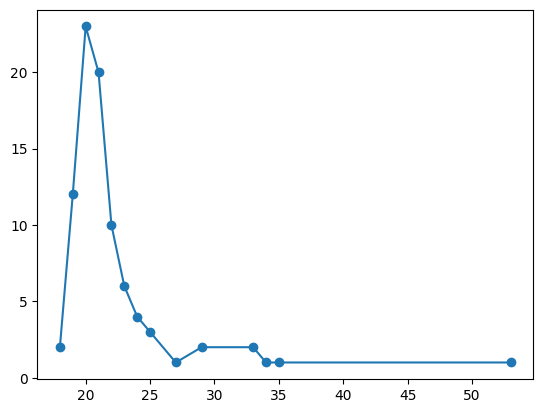

In [330]:
plt.plot(participants_age.index, participants_age, 'o-')
plt.show()

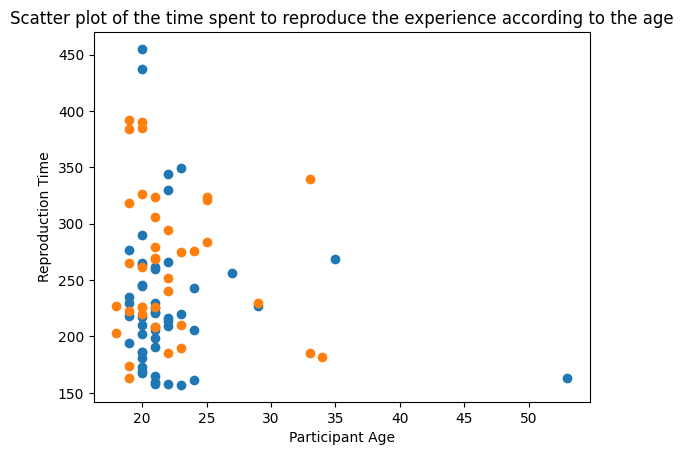

In [331]:
plt.scatter( dataControl[['Age']], dataControl[['Time']])
plt.scatter( dataAR[['Age']], dataAR[['Time']])
plt.title("Scatter plot of the time spent to reproduce the experience according to the age")
plt.ylabel("Reproduction Time")
plt.xlabel("Participant Age")
plt.show()

## Analysis of the quantative data 

### Time spent according to experimental groups

##### Descriptive statistics

In [332]:
groupedData = dataAllSuccess.groupby(['Group'])
groupedDatadescription = groupedData.describe()
groupedDatadescription

Time                                                            Help  \
        count        mean        std    min    25%    50%    75%    max count   
Group                                                                           
AR       37.0  264.918919  64.910356  163.0  220.0  265.0  318.0  392.0  37.0   
Control  51.0  230.235294  63.888211  157.0  188.5  218.0  258.0  455.0  51.0   

                   ... SufficientEncoded      SelfPerformanceEncoded  \
             mean  ...               75%  max                  count   
Group              ...                                                 
AR       0.648649  ...               5.0  5.0                   37.0   
Control  0.529412  ...               5.0  5.0                   51.0   

                                                      
             mean       std  min  25%  50%  75%  max  
Group                                                 
AR       3.675676  0.783654  2.0  3.0  4.0  4.0  5.0  
Control  3.568627  0.700140  1.0  3.0  4.0  4.0  5.0  

[2 rows x 96 columns]

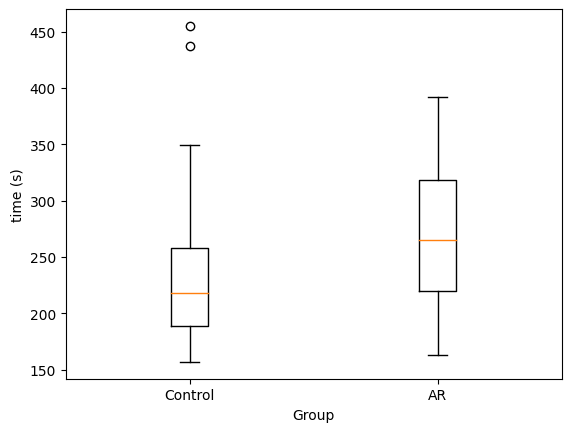

In [333]:
fig, ax = plt.subplots()
ax.boxplot([dataControlSuccess['Time'], dataARSuccess['Time']], labels=['Control', 'AR'])
ax.set_ylabel('time (s)')
ax.set_xlabel('Group')
plt.show()

Calculate the confidence interval for time for each participant group

In [334]:
# https://www.statology.org/confidence-intervals-python/
controlTimeIC = stats.t.interval(0.95, df=len(dataControlSuccess['Time'])-1, loc=dataControlSuccess['Time'].mean(), scale=stats.sem(dataControlSuccess['Time'])) 
arTimeIC = stats.t.interval(0.95, df=len(dataARSuccess['Time'])-1, loc=dataARSuccess['Time'].mean(), scale=stats.sem(dataARSuccess['Time'])) 
timeIC = [ abs(arTimeIC[0] - dataARSuccess['Time'].mean()), abs(controlTimeIC[0] - dataControlSuccess['Time'].mean())]
timeIC

[21.64219029558319, 17.968848932485486]

In [335]:
# https://www.statology.org/confidence-intervals-python/ 
controlTimeIC = stats.norm.interval(0.95, loc=dataControlSuccess['Time'].mean(), scale=stats.sem(dataControlSuccess['Time'])) 
arTimeIC = stats.norm.interval(0.95, loc=dataARSuccess['Time'].mean(), scale=stats.sem(dataARSuccess['Time'])) 
timeIC= [ abs(arTimeIC[0] - dataARSuccess['Time'].mean()), abs(controlTimeIC[0] - dataControlSuccess['Time'].mean())]
timeIC

[20.91516147939842, 17.534110189222247]

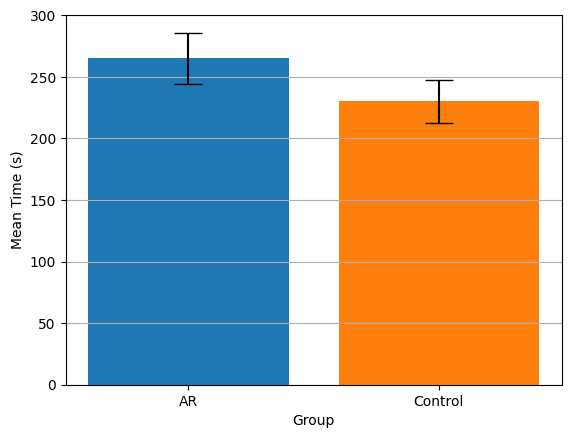

In [336]:
groupcolor = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(groupedDatadescription.index.to_list(), groupedDatadescription['Time']['mean'], yerr=timeIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_xticks(groupedDatadescription.index.to_list())
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group')
ax.yaxis.grid(True)

#### Statistical test

In [337]:
controlGp = dataAllSuccess.loc[dataAllSuccess['Group']=="Control"]
ARGp = dataAllSuccess.loc[dataAllSuccess['Group']=="AR"]

__Student test__

In [338]:
unilat_test = stats.ttest_ind(a=controlGp['Time'], b=ARGp['Time'], equal_var=False, alternative="less")
print(f"Unilateral test (AR group faster than control group): {unilat_test}")

Unilateral test (AR group faster than control group): Ttest_indResult(statistic=-2.4907307934904512, pvalue=0.007450547580320081)


__ANOVA test__

null hypothesis: the two groups have the same population mean

In [339]:
stats.f_oneway(controlGp['Time'], ARGp['Time'])

F_onewayResult(statistic=6.23551429026943, pvalue=0.014426971259486707)

p-value<0.05 --> null hypothsis rejected 

the AR and control groups doesn't have the same mean. 

Surprisingly, control group is faster than AR group during the reporduction

### Time spent to reproduce tasks according to previous AR experience

#### Considering the presence or absence of experience

In [340]:
dataARexperience = dataAllSuccess.groupby(['Group','ARexperience'])
dataARexperienceDesc = dataARexperience['Time'].describe()
dataARexperienceDesc

count        mean        std    min     25%    50%  \
Group   ARexperience                                                       
AR      No             23.0  262.652174  69.983510  163.0  209.00  262.0   
        Yes            14.0  268.642857  57.925160  185.0  226.25  272.5   
Control No             39.0  230.923077  70.331315  157.0  183.50  217.0   
        Yes            12.0  228.000000  38.186147  161.0  200.00  228.5   

                        75%    max  
Group   ARexperience                
AR      No            319.5  392.0  
        Yes           300.5  390.0  
Control No            245.5  455.0  
        Yes           263.0  277.0

Calculate the confidence interval for reproduction error done by participants durintg the reproduction phase for each group

In [341]:
# https://www.statology.org/confidence-intervals-python/ 
controlTimeWithoutARexpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('Control', 'No')], scale=dataARexperience['Time'].sem().loc[('Control', 'No')]) 
controlTimeWithARexpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('Control', 'Yes')], scale=dataARexperience['Time'].sem().loc[('Control', 'Yes')]) 
arTimeWithoutARExpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('AR', 'No')], scale=dataARexperience['Time'].sem().loc[('AR', 'No')]) 
arTimeWithARExpeIC = stats.norm.interval(0.95, loc=dataARexperienceDesc['mean'].loc[('AR', 'Yes')], scale=dataARexperience['Time'].sem().loc[('Control', 'Yes')]) 
arExpTimeIC= [ abs(arTimeWithoutARExpeIC[0] - dataARexperienceDesc['mean'].loc[('AR', 'No')]), abs(arTimeWithARExpeIC[0] - dataARexperienceDesc['mean'].loc[('AR', 'Yes')]), abs(controlTimeWithoutARexpeIC[0] - dataARexperienceDesc['mean'].loc[('Control', 'No')]), abs(controlTimeWithARexpeIC[0] - dataARexperienceDesc['mean'].loc[('Control', 'Yes')])]
arExpTimeIC

[28.600912862055907,
 21.605449558753975,
 22.073160827567193,
 21.605449558753975]

In [342]:
# label for the graph
groups= []
for gptuple in dataARexperienceDesc.index.to_list():
    name = '-'.join(gptuple)
    groups.append(name)

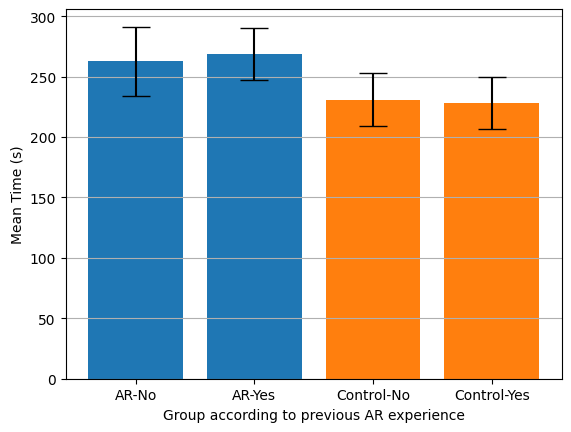

In [343]:
groupcolor = ['tab:blue','tab:blue', 'tab:orange','tab:orange']
fig, ax = plt.subplots()
ax.bar(groups, dataARexperienceDesc['mean'], yerr=arExpTimeIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_xticks(groups)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous AR experience')
ax.yaxis.grid(True)

#### Statistical test

In [344]:
timeWithoutARexpe = dataAllSuccess.loc[dataAllSuccess['ARexperience']=="No"]
timeControlWithoutARexpe = timeWithoutARexpe.loc[timeWithoutARexpe['Group']== 'Control']['Time']
timeARWithoutARexpe = timeWithoutARexpe.loc[timeWithoutARexpe['Group']== 'AR']['Time']

timeWithARexpe = dataAllSuccess.loc[dataAllSuccess['ARexperience']=="Yes"]
timeControlWithARexpe = timeWithARexpe.loc[timeWithARexpe['Group']== 'Control']['Time']
timeARWithARexpe = timeWithARexpe.loc[timeWithARexpe['Group']== 'AR']['Time']
stats.f_oneway(timeARWithoutARexpe, timeControlWithoutARexpe)
# stats.f_oneway(timeARWithARexpe, timeControlWithARexpe)

F_onewayResult(statistic=2.955239105668435, pvalue=0.09075541683997926)

When comparing the two group without AR experience:

P-value > 0.05 --> null hypothesis can't be rejected

The AR and control groups without AR experience have the same mean. 


In [345]:
stats.f_oneway(timeARWithARexpe, timeControlWithARexpe)

F_onewayResult(statistic=4.293763377837327, pvalue=0.049162095613276884)

When comparing the two groups *with* AR experience:

P-value < 0.05 --> null hypothesis can be rejected

The AR and control groups with AR experience have different mean time. 

In [346]:
unilat_test = stats.ttest_ind(a=controlGp.loc[controlGp['ARexperience']=='Yes']['Time'], b=ARGp.loc[ARGp['ARexperience']=='Yes']['Time'], equal_var=False, alternative="less")
print(f"Unilateral test (AR group faster than control group): {unilat_test}")

Unilateral test (AR group faster than control group): Ttest_indResult(statistic=-2.13856120438093, pvalue=0.021746457013234372)


In [347]:
dataARexperienceCat = dataAllSuccess.groupby(['Group','ARexperience-cat'])
dataARexperienceCatDescribe = dataARexperienceCat.describe()
dataARexperienceCatDescribe

Time                                               \
                         count        mean        std    min     25%    50%   
Group   ARexperience-cat                                                      
AR      Never             23.0  262.652174  69.983510  163.0  209.00  262.0   
        Rarely            11.0  266.727273  58.259919  185.0  226.50  269.0   
        Sometimes          2.0  271.500000  96.873629  203.0  237.25  271.5   
        Moderately         1.0  284.000000        NaN  284.0  284.00  284.0   
Control Never             39.0  230.923077  70.331315  157.0  183.50  217.0   
        Rarely            12.0  228.000000  38.186147  161.0  200.00  228.5   

                                         Help            ...  \
                             75%    max count      mean  ...   
Group   ARexperience-cat                                 ...   
AR      Never             319.50  392.0  23.0  0.695652  ...   
        Rarely            292.50  390.0  11.0  0.545455  ...   
        Sometimes         305.75  340.0   2.0  0.500000  ...   
        Moderately        284.00  284.0   1.0  1.000000  ...   
Control Never             245.50  455.0  39.0  0.512821  ...   
        Rarely            263.00  277.0  12.0  0.583333  ...   

                         SufficientEncoded      SelfPerformanceEncoded  \
                                       75%  max                  count   
Group   ARexperience-cat                                                 
AR      Never                         5.00  5.0                   23.0   
        Rarely                        4.00  5.0                   11.0   
        Sometimes                     3.75  4.0                    2.0   
        Moderately                    5.00  5.0                    1.0   
Control Never                         5.00  5.0                   39.0   
        Rarely                        5.00  5.0                   12.0   

                                                                       
                              mean       std  min  25%  50%  75%  max  
Group   ARexperience-cat                                               
AR      Never             3.565217  0.895752  2.0  3.0  4.0  4.0  5.0  
        Rarely            3.818182  0.603023  3.0  3.5  4.0  4.0  5.0  
        Sometimes         4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
        Moderately        4.000000       NaN  4.0  4.0  4.0  4.0  4.0  
Control Never             3.564103  0.753758  1.0  3.0  4.0  4.0  5.0  
        Rarely            3.583333  0.514929  3.0  3.0  4.0  4.0  4.0  

[6 rows x 96 columns]

In [348]:
expeCatgroups= []
for gptuple in dataARexperienceCatDescribe.index.to_list():
    name = '-'.join(gptuple)
    expeCatgroups.append(name)

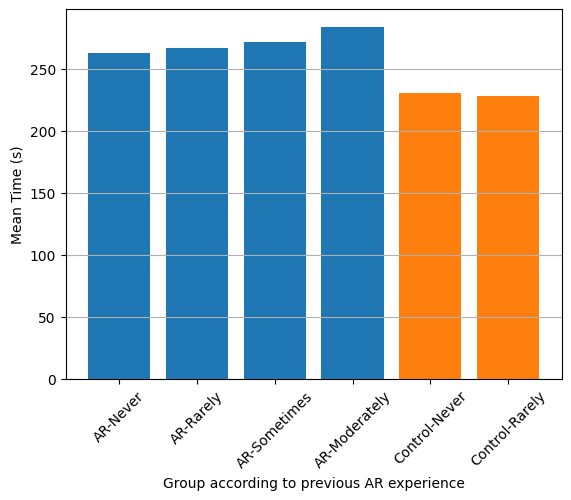

In [349]:
expeCatgroupsColor= ['tab:blue'] * 4 + ['tab:orange'] * 2
fig, ax = plt.subplots()
# ax.bar(expeCatgroups, dataARexperienceCatDescribe['Time']['mean'], yerr=dataARexperienceCatDescribe['Time']['std'], align='center', color=expeCatgroupsColor ,ecolor='black', capsize=10)
ax.bar(expeCatgroups, dataARexperienceCatDescribe['Time']['mean'], align='center', color=expeCatgroupsColor ,ecolor='black', capsize=10)
plt.xticks(rotation = 45)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous AR experience')
ax.yaxis.grid(True)

### Time spent according to previous machinery experience

In [350]:
dataMachineryExp = dataAllSuccess.groupby(['Group','MachineryExp'])
dataMachineryExpDescribe = dataMachineryExp['Time'].describe()
dataMachineryExpDescribe

count        mean        std    min     25%    50%  \
Group   MachineryExp                                                       
AR      No             24.0  257.958333  69.559158  163.0  206.75  235.0   
        Yes            13.0  277.769231  55.592496  185.0  226.00  276.0   
Control No             30.0  239.633333  74.637738  157.0  195.25  219.0   
        Yes            21.0  216.809524  42.483666  160.0  186.00  209.0   

                         75%    max  
Group   MachineryExp                 
AR      No            318.75  392.0  
        Yes           306.00  390.0  
Control No            262.75  455.0  
        Yes           245.00  330.0

In [351]:
# https://www.statology.org/confidence-intervals-python/ 
controlTimeWithoutMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('Control', 'No')], df=len(controlGp.loc[controlGp['MachineryExp']=='No'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'No')]) 
controlTimeWithMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('Control', 'Yes')], df=len(controlGp.loc[controlGp['MachineryExp']=='Yes'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'Yes')]) 
arTimeWithoutMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('AR', 'No')], df=len(ARGp.loc[ARGp['MachineryExp']=='No'])-1, scale=dataMachineryExp['Time'].sem().loc[('AR', 'No')]) 
arTimeWithMachinExpeIC = stats.t.interval(0.95, loc=dataMachineryExpDescribe['mean'].loc[('AR', 'Yes')], df=len(ARGp.loc[ARGp['MachineryExp']=='Yes'])-1, scale=dataMachineryExp['Time'].sem().loc[('Control', 'Yes')]) 
machExpTimeIC= [ abs(arTimeWithoutMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('AR', 'No')]), abs(arTimeWithMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('AR', 'Yes')]), abs(controlTimeWithoutMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('Control', 'No')]), abs(controlTimeWithMachinExpeIC[0] - dataMachineryExpDescribe['mean'].loc[('Control', 'Yes')])]
machExpTimeIC

[29.37225636700441, 20.199111462765416, 27.870189453638602, 19.338333061443336]

In [352]:
machineryExpeGroups= []
for gptuple in dataMachineryExpDescribe.index.to_list():
    name = '-'.join(gptuple)
    machineryExpeGroups.append(name)

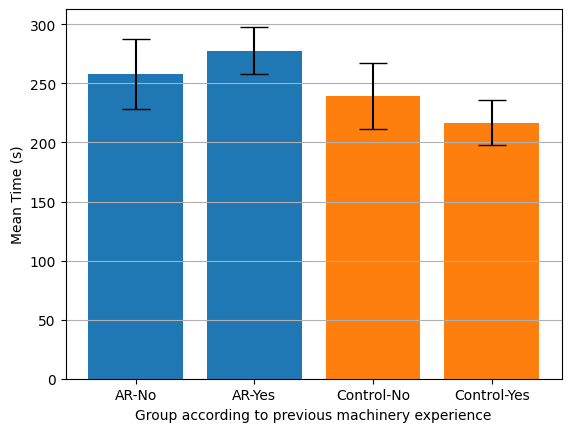

In [353]:
machineryGroupColor = ['tab:blue'] *2 + ['tab:orange'] *2
fig, ax = plt.subplots()
ax.bar(machineryExpeGroups, dataMachineryExpDescribe['mean'], yerr=machExpTimeIC, align='center', color=machineryGroupColor ,ecolor='black', capsize=10)
# ax.set_xticks(Groups)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous machinery experience')
ax.yaxis.grid(True)

#### Statistical test 

In [354]:
unilat_test = stats.ttest_ind(a=controlGp.loc[controlGp['MachineryExp']=="Yes"]['Time'], b=ARGp.loc[ARGp['MachineryExp']=="Yes"]['Time'], equal_var=False, alternative="less")
print(f"Unilateral test (AR group faster than control group): {unilat_test}")

Unilateral test (AR group faster than control group): Ttest_indResult(statistic=-3.38833165362807, pvalue=0.0014125972047062472)


In [355]:
stats.f_oneway(controlGp.loc[controlGp['MachineryExp']=="Yes"]['Time'], ARGp.loc[ARGp['MachineryExp']=="Yes"]['Time'])

F_onewayResult(statistic=13.046859997011705, pvalue=0.0010270298951038485)

Explore more in detail the different catergory of machinery experience.

In [356]:
dataMachineryExpCat = dataAllSuccess.groupby(['Group','MachineryExp-cat'])['Time']
dataMachineryExpCatDescribe = dataMachineryExpCat.describe()
dataMachineryExpCatDescribe

count        mean        std    min     25%    50%  \
Group   MachineryExp-cat                                                       
AR      None               25.0  261.240000  70.043605  163.0  208.00  240.0   
        Very Little         4.0  264.500000  30.138569  223.0  254.50  270.5   
        Little              4.0  276.500000  41.227014  226.0  259.00  277.0   
        Familiar            1.0  306.000000        NaN  306.0  306.00  306.0   
        Very Familiar       1.0  390.000000        NaN  390.0  390.00  390.0   
Control None               30.0  239.633333  74.637738  157.0  195.25  219.0   
        Very Little         9.0  213.222222  38.476544  160.0  191.00  208.0   
        Little              9.0  215.333333  51.366331  165.0  181.00  209.0   

                             75%    max  
Group   MachineryExp-cat                 
AR      None              321.00  392.0  
        Very Little       280.50  294.0  
        Little            294.50  326.0  
        Familiar          306.00  306.0  
        Very Familiar     390.00  390.0  
Control None              262.75  455.0  
        Very Little       245.00  265.0  
        Little            230.00  330.0

In [357]:
machineryExpeCatGroups= []
for gptuple in dataMachineryExpCatDescribe.index.to_list():
    name = '-'.join(gptuple)
    machineryExpeCatGroups.append(name)

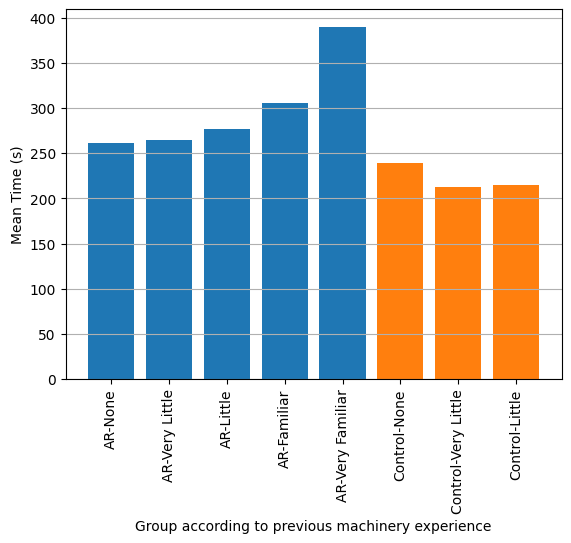

In [358]:
groupcolor = ['tab:blue'] *5 + ['tab:orange'] *4
fig, ax = plt.subplots()
# ax.bar(machineryExpeCatGroups, dataMachineryExpCatDescribe['mean'], yerr=dataMachineryExpCatDescribe['std'], align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.bar(machineryExpeCatGroups, dataMachineryExpCatDescribe['mean'], align='center', color=groupcolor ,ecolor='black', capsize=10)
plt.xticks(rotation = 90)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group according to previous machinery experience')
ax.yaxis.grid(True)

### Time spent according to previous experience (no experience in AR or machinery VS other)

In [359]:
ARgpNoARexp = ARGp.loc[ARGp['ARexperience']=="No"]
ARgpNoExpAtAll = ARgpNoARexp.loc[ARgpNoARexp['MachineryExp']=="No"]

ctlGpNoARexp = controlGp.loc[controlGp['ARexperience']=="No"]
ctlGpNoExpAtAll = ctlGpNoARexp.loc[ctlGpNoARexp['MachineryExp']=="No"]


In [360]:
ARgpNoExpAtAllIC = stats.t.interval(0.95, loc=ARgpNoExpAtAll['Time'].mean(), df=len(ARgpNoExpAtAll['Time'])-1, scale=ARgpNoExpAtAll['Time'].sem()) 
ctlGpNoExpAtAllIC = stats.t.interval(0.95, loc=ctlGpNoExpAtAll['Time'].mean(), df=len(ctlGpNoExpAtAll['Time'])-1, scale=ctlGpNoExpAtAll['Time'].sem())
noExpTimeIc = [ abs(ARgpNoExpAtAllIC[0]-ARgpNoExpAtAll['Time'].mean()),abs( ctlGpNoExpAtAllIC[0] - ctlGpNoExpAtAll['Time'].mean())] 
noExpTimeIc

[38.84362959362869, 34.53991137709639]

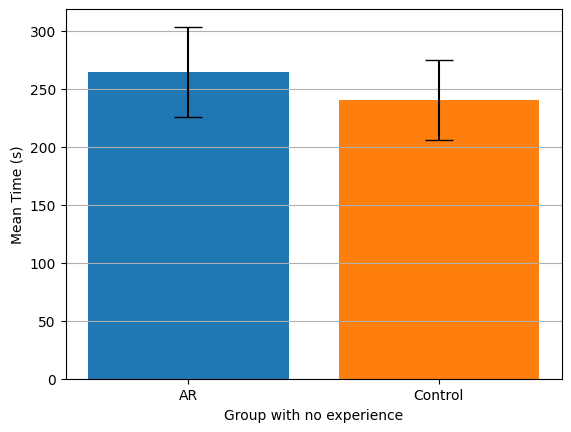

In [361]:
noExpeCatGroups = ['AR' , 'Control']
groupcolor = ['tab:blue'] + ['tab:orange'] 
fig, ax = plt.subplots()
# ax.bar(machineryExpeCatGroups, dataMachineryExpCatDescribe['mean'], yerr=dataMachineryExpCatDescribe['std'], align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.bar(noExpeCatGroups, [ARgpNoExpAtAll['Time'].mean(), ctlGpNoExpAtAll['Time'].mean()], yerr= noExpTimeIc, align='center', color=groupcolor ,ecolor='black', capsize=10)
ax.set_ylabel('Mean Time (s)')
ax.set_xlabel('Group with no experience')
ax.yaxis.grid(True)

#### Satistical test

In [362]:
stats.f_oneway(ctlGpNoExpAtAll['Time'], ARgpNoExpAtAll['Time'])

F_onewayResult(statistic=0.9220590954572235, pvalue=0.342703680939479)

### Analysis of the help request rate when reproducing the learnt task

Calculate the confidence interval for request done during reproduction phase

In [363]:
groupedDatadescription['Help']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
AR,37.0,0.648649,0.856875,0.0,0.0,0.0,1.0,4.0
Control,51.0,0.529412,0.783657,0.0,0.0,0.0,1.0,3.0


In [364]:
# https://www.statology.org/confidence-intervals-python/ 
controlHelpIC = stats.norm.interval(0.95, loc=groupedDatadescription['Help']['mean'].loc[('Control')], scale=stats.sem(dataControlSuccess['Help'])) 
arHelpIC = stats.norm.interval(0.95, loc=groupedDatadescription['Help']['mean'].loc[('AR')], scale=stats.sem(dataARSuccess['Help'])) 
helpIC= [ abs(arHelpIC[0] - groupedDatadescription['Help']['mean'].loc[('AR')]), abs(controlHelpIC[0] - groupedDatadescription['Help']['mean'].loc[('Control')])]

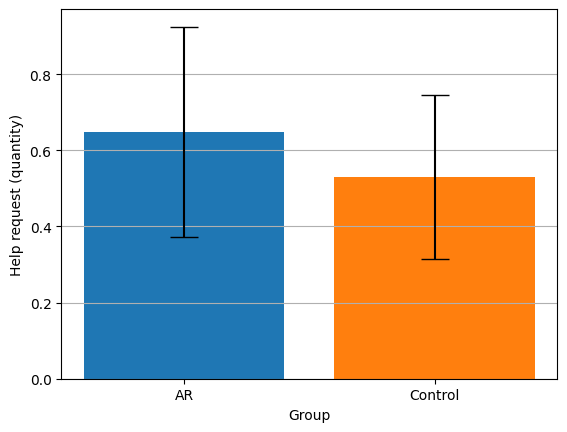

In [365]:
groupcolor = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(groupedDatadescription.index.to_list(), groupedDatadescription['Help']['mean'], yerr=helpIC,  align='center', color=groupcolor ,ecolor='black', capsize=10)
# ax.set_xticks(groupedDatadescription.index.to_list())
ax.set_ylabel('Help request (quantity)')
ax.set_xlabel('Group')
ax.yaxis.grid(True)

### Analysis of the disorder rate when reproducing the learnt task

In [366]:
groupedDatadescription['Disorder']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
AR,37.0,1.513514,1.121052,0.0,1.0,1.0,2.0,4.0
Control,51.0,1.176471,1.090062,0.0,0.0,1.0,2.0,4.0


In [367]:
# https://www.statology.org/confidence-intervals-python/ 
controlDisorderIC = stats.norm.interval(0.95, loc=groupedDatadescription['Disorder']['mean'].loc[('Control')], scale=stats.sem(dataControlSuccess['Disorder'])) 
arDisorderIC = stats.norm.interval(0.95, loc=groupedDatadescription['Disorder']['mean'].loc[('AR')], scale=stats.sem(dataARSuccess['Disorder'])) 
disorderIC= [ abs(arDisorderIC[0] - groupedDatadescription['Disorder']['mean'].loc[('AR')]), abs(controlDisorderIC[0] - groupedDatadescription['Disorder']['mean'].loc[('Control')])]

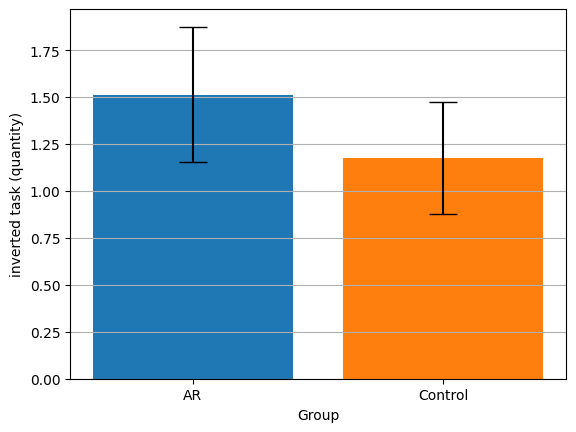

In [368]:
groupcolor = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(groupedDatadescription.index.to_list(), groupedDatadescription['Disorder']['mean'], yerr=disorderIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
# ax.set_xticks(groupedDatadescription.index.to_list())
ax.set_ylabel('inverted task (quantity)')
ax.set_xlabel('Group')
ax.yaxis.grid(True)

### Analysis of the error rate when reproducing the learnt task

In [369]:
groupedDatadescription['Error']

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
AR,37.0,2.027027,1.481112,0.0,1.0,2.0,3.0,6.0
Control,51.0,1.039216,1.019035,0.0,0.0,1.0,2.0,4.0


In [370]:
# https://www.statology.org/confidence-intervals-python/ 
controlErrorIC = stats.norm.interval(0.95, loc=groupedDatadescription['Error']['mean'].loc[('Control')], scale=stats.sem(dataControlSuccess['Error'])) 
arErrorIC = stats.norm.interval(0.95, loc=groupedDatadescription['Error']['mean'].loc[('AR')], scale=stats.sem(dataARSuccess['Error'])) 
errorIC= [ abs(arErrorIC[0] - groupedDatadescription['Error']['mean'].loc[('AR')]), abs(controlErrorIC[0] - groupedDatadescription['Error']['mean'].loc[('Control')])]

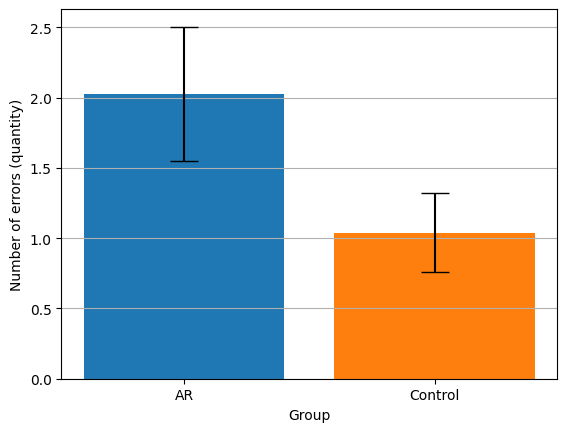

In [371]:
groupcolor = ['tab:blue', 'tab:orange']
fig, ax = plt.subplots()
ax.bar(groupedDatadescription.index.to_list(), groupedDatadescription['Error']['mean'], yerr=errorIC, align='center', color=groupcolor ,ecolor='black', capsize=10)
# ax.set_xticks(groupedDatadescription.index.to_list())
ax.set_ylabel('Number of errors (quantity)')
ax.set_xlabel('Group')
ax.yaxis.grid(True)

### Common visualization of objective indicators

In [372]:
dataARSuccessStd = dataARSuccess.std(numeric_only=True)[['Help','Disorder','Error']]
dataControlSuccessStd = dataControlSuccess.std(numeric_only=True)[['Help','Disorder','Error']]

In [373]:
# order of the list : Help, disorder, error conficende interval 
arObjIndIC = [helpIC[0],disorderIC[0],errorIC[0]]
controlObjIndIC = [helpIC[1],disorderIC[1],errorIC[1]]

In [374]:
dataARSuccessMean =dataARSuccess.mean(numeric_only=True)[['Help','Disorder','Error']]
dataControlSuccessMean = dataControlSuccess.mean(numeric_only=True)[['Help','Disorder','Error']]

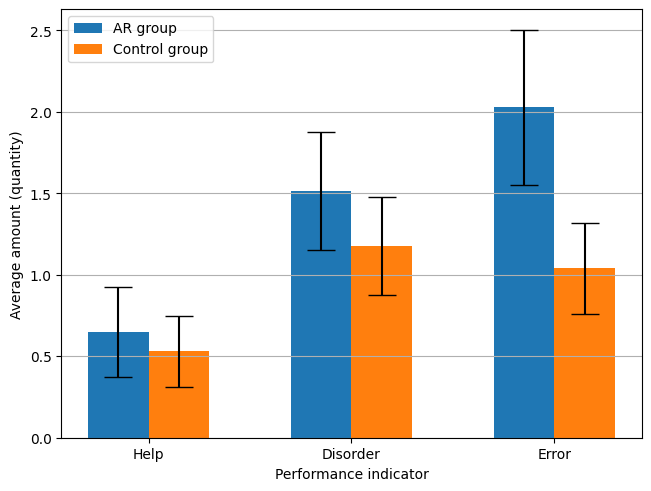

In [375]:
#fig = plt.figure(figsize=(16,8))
#ax = fig.add_subplot(111)
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

AR_rect = ax.bar(X_Axis - 0.15, dataARSuccessMean, yerr = arObjIndIC, width = 0.3, label = "AR group",align='center',ecolor='black', capsize=10)
Control_rect = ax.bar(X_Axis + 0.15, dataControlSuccessMean, yerr = controlObjIndIC, width = 0.3, label = "Control group", align='center', ecolor='black', capsize=10)


ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
# ax.bar_label(Control_rect)
# ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

#### Statistical test

In [376]:
unilat_test = stats.ttest_ind(a=dataControlSuccess['Error'], b=dataARSuccess['Error'], equal_var=False, alternative="less")
print(f"Unilateral test (AR group do more error than control group): {unilat_test}")

Unilateral test (AR group do more error than control group): Ttest_indResult(statistic=-3.5000961722281585, pvalue=0.0004422979920712838)


### Objective indicators for no experience participants (no experience in AR or machinery)

In [377]:
ARgpNoExpAtAllDescription = ARgpNoExpAtAll.describe()
ctlGpNoExpAtAllDescription = ctlGpNoExpAtAll.describe()

In [378]:
# confidence interval calculation 
controlNoExpeHelpIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Help']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Help'])) 
arNoExpHelpIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Help']['mean'], scale=stats.sem(ARgpNoExpAtAll['Help'])) 
helpNoExpeIC= [ abs(arNoExpHelpIC[0] - ARgpNoExpAtAllDescription['Help']['mean']), abs(controlNoExpeHelpIC[0] - ctlGpNoExpAtAllDescription['Help']['mean'])]

controlNoExpeDisorderIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Disorder']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Disorder'])) 
arNoExpDisorderIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Disorder']['mean'], scale=stats.sem(ARgpNoExpAtAll['Disorder'])) 
disorderNoExpeIC= [ abs(arNoExpDisorderIC[0] - ARgpNoExpAtAllDescription['Disorder']['mean']), abs(controlNoExpeDisorderIC[0] - ctlGpNoExpAtAllDescription['Disorder']['mean'])]

controlNoExpeErrorIC = stats.norm.interval(0.95, loc=ctlGpNoExpAtAllDescription['Error']['mean'], scale=stats.sem(ctlGpNoExpAtAll['Error'])) 
arNoExpErrorIC = stats.norm.interval(0.95, loc=ARgpNoExpAtAllDescription['Error']['mean'], scale=stats.sem(ARgpNoExpAtAll['Error'])) 
errorNoExpeIC= [ abs(arNoExpDisorderIC[0] - ARgpNoExpAtAllDescription['Error']['mean']), abs(controlNoExpeErrorIC[0] - ctlGpNoExpAtAllDescription['Error']['mean'])]

In [379]:
# order of the list : Help, disorder, error conficende interval 
arObjNoExpIndIC = [helpNoExpeIC[0],disorderNoExpeIC[0],errorNoExpeIC[0]]
controlObjNoExpIndIC = [helpNoExpeIC[1],disorderNoExpeIC[1],errorNoExpeIC[1]]

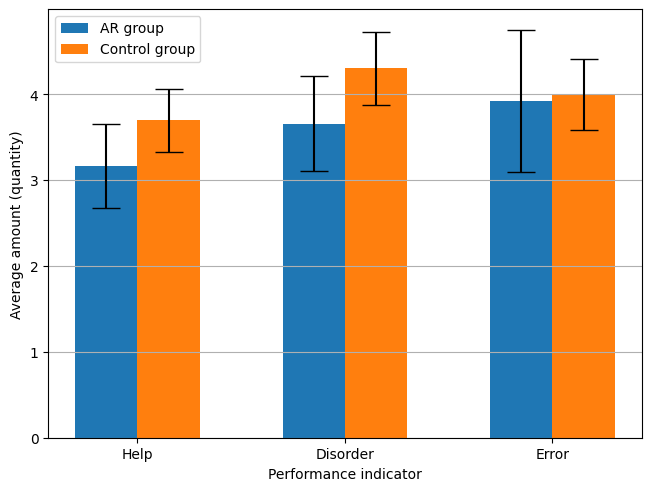

In [380]:
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

AR_rect = ax.bar(X_Axis - 0.15, ARgpNoExpAtAllDescription.mean(numeric_only=True)[['Help','Disorder','Error']], yerr = arObjNoExpIndIC, width = 0.3, label = "AR group",align='center',ecolor='black', capsize=10)
Control_rect = ax.bar(X_Axis + 0.15, ctlGpNoExpAtAllDescription.mean(numeric_only=True)[['Help','Disorder','Error']], yerr = controlObjNoExpIndIC, width = 0.3, label = "Control group", align='center', ecolor='black', capsize=10)


ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
# ax.bar_label(Control_rect)
# ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

In [381]:
unilat_test = stats.ttest_ind(a=ctlGpNoExpAtAll['Error'], b=ARgpNoExpAtAll['Error'], equal_var=False)
print(f"Bilateral test (AR group is not different than control group): {unilat_test}")

Bilateral test (AR group is not different than control group): Ttest_indResult(statistic=-2.0764742094851782, pvalue=0.04708755863893087)


## Analysis of the role of gender

In [382]:
dataARSuccessTimeStdGender = dataARSuccess.groupby(['Gender']).std(numeric_only=True)[['Time']]
dataARSuccessTimeMeanGender =dataARSuccess.groupby(['Gender']).mean(numeric_only=True)[['Time']]

dataControlSuccessTimeStdGender = dataControlSuccess.groupby(['Gender']).std(numeric_only=True)[['Time']]
dataControlSuccessTimeMeanGender = dataControlSuccess.groupby(['Gender']).mean(numeric_only=True)[['Time']]


In [383]:
dataControlSuccessTimeMeanGender = dataControlSuccessTimeMeanGender.transpose()
dataControlSuccessTimeStdGender = dataControlSuccessTimeStdGender.transpose()
dataARSuccessTimeMeanGender = dataARSuccessTimeMeanGender.transpose()
dataARSuccessTimeStdGender = dataARSuccessTimeStdGender.transpose()

In [384]:
dataControlSuccessTimeMeanGenderTemp = pd.concat([dataControlSuccessTimeMeanGender, dataARSuccessTimeMeanGender])
dataControlSuccessTimeStdGenderTemp = pd.concat([dataControlSuccessTimeStdGender, dataARSuccessTimeStdGender])

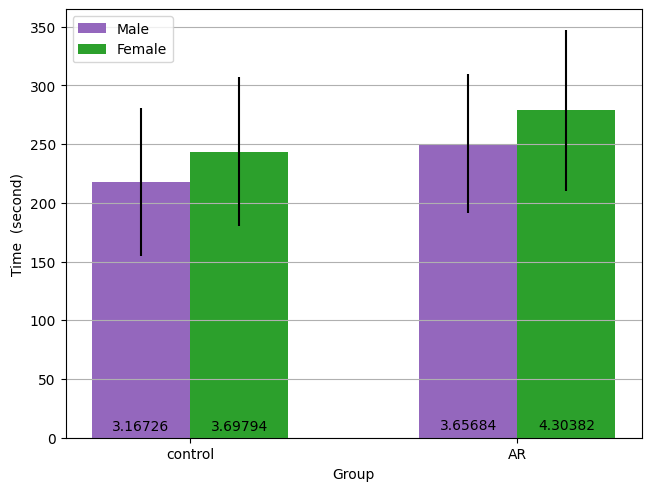

In [385]:
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['control' , 'AR'])
X_Axis =  np.arange(len(Error_Types))

male_rect = ax.bar(X_Axis - 0.15, dataControlSuccessTimeMeanGenderTemp['Male'], yerr=dataControlSuccessTimeStdGenderTemp['Male'], width = 0.3, label = "Male", color= 'tab:purple')
female_rect = ax.bar(X_Axis + 0.15, dataControlSuccessTimeMeanGenderTemp['Female'], yerr=dataControlSuccessTimeStdGenderTemp['Female'], width = 0.3, label = "Female", color= 'tab:green')

ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Time  (second)")
ax.set_xlabel("Group")
ax.bar_label(Control_rect)
ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

In [386]:
dataARSuccessStdGender = dataARSuccess.groupby(['Gender']).std(numeric_only=True)[['Help','Disorder','Error']]
dataARSuccessMeanGender =dataARSuccess.groupby(['Gender']).mean(numeric_only=True)[['Help','Disorder','Error']]

dataControlSuccessStdGender = dataControlSuccess.groupby(['Gender']).std(numeric_only=True)[['Help','Disorder','Error']]
dataControlSuccessMeanGender = dataControlSuccess.groupby(['Gender']).mean(numeric_only=True)[['Help','Disorder','Error']]


In [387]:
dataControlSuccessMeanGender = dataControlSuccessMeanGender.transpose()
dataControlSuccessStdGender = dataControlSuccessStdGender.transpose()

In [388]:
dataControlSuccessStdGender

Gender,Female,Male
Help,0.866025,0.706018
Disorder,0.812404,1.270372
Error,1.027943,1.016782


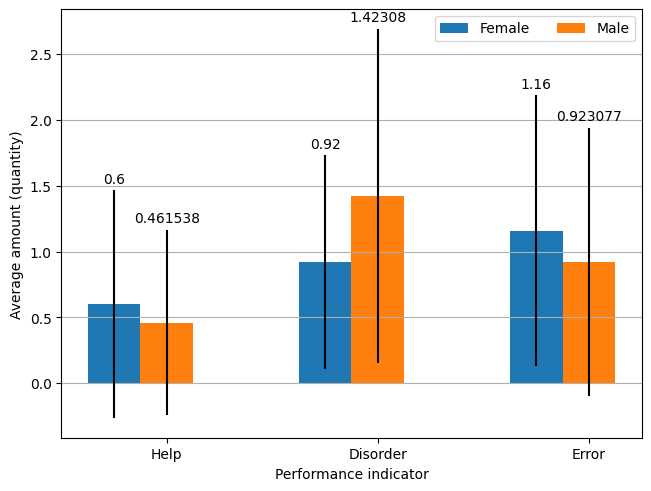

In [389]:
fig, ax = plt.subplots(layout='constrained')

x = np.arange(dataControlSuccessMeanGender.shape[0])  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in dataControlSuccessMeanGender.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, yerr=dataControlSuccessStdGender[attribute], label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x + width, dataControlSuccessMeanGender.index.tolist())
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
ax.legend(loc='upper right', ncols=3)
ax.yaxis.grid(True)
plt.show()

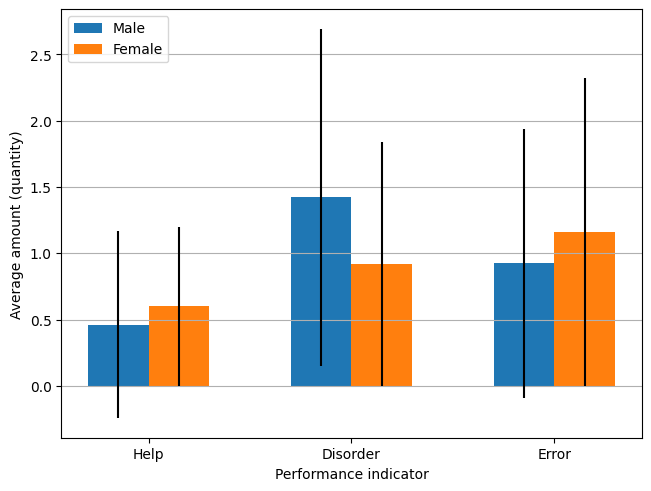

In [390]:
fig, ax = plt.subplots(layout='constrained')

Error_Types = np.array(['Help', 'Disorder', 'Error'])
X_Axis =  np.arange(len(Error_Types))

male_rect = ax.bar(X_Axis - 0.15, dataControlSuccessMeanGender['Male'], yerr = dataControlSuccessStdGender['Male'], width = 0.3, label = "Male")
female_rect = ax.bar(X_Axis + 0.15, dataControlSuccessMeanGender['Female'], yerr = dataControlSuccessMeanGender['Female'], width = 0.3, label = "Female")

ax.set_xticks(X_Axis, Error_Types)
ax.set_ylabel("Average amount (quantity)")
ax.set_xlabel("Performance indicator")
# ax.bar_label(Control_rect)
# ax.bar_label(AR_rect)
ax.legend(loc = 'upper left')
ax.yaxis.grid(True)
plt.show()

## Analysis of the after training survey

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis '

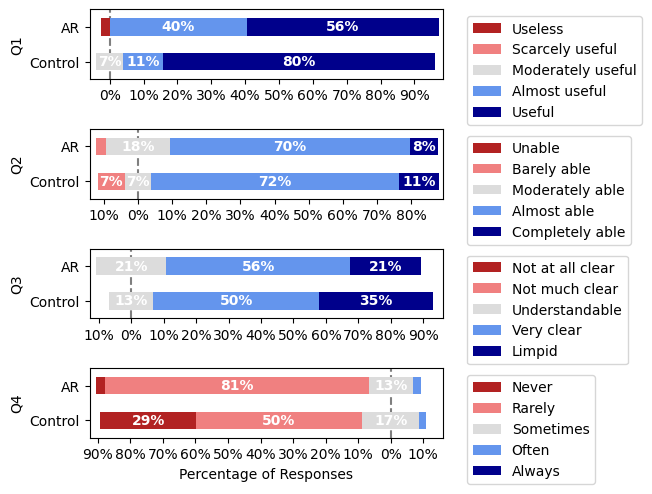

In [465]:
fig, axes = plt.subplots(nrows = 4, layout='constrained')
# fig = plt.figure(figsize=(12,12))

plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Utility'],'Control':dataControlSuccess['Utility']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[0])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['ReprodAlone'],'Control':dataControlSuccess['ReprodAlone']}), reprodAloneCat, bar_labels = True, plot_percentage=True, ax = axes[1])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Clarity'],'Control':dataControlSuccess['Clarity']}), clarityCat, bar_labels = True, plot_percentage=True, ax = axes[2])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['ExplicaNeed'],'Control':dataControlSuccess['ExplicaNeed']}), explicaNeedCat, bar_labels = True, plot_percentage=True, ax = axes[3])

for i in range(3):
     axes[i].set_xlabel('')

axes[0].set_ylabel('Q1')
axes[1].set_ylabel('Q2')
axes[2].set_ylabel('Q3')
axes[3].set_ylabel('Q4')

plt.show()


### Perceived utility analysis

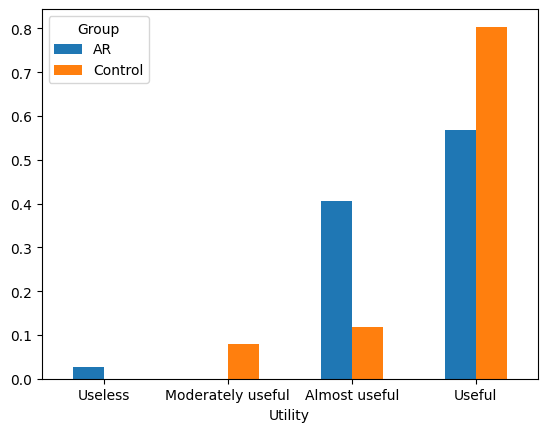

In [392]:
pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['Utility'] ,margins=False, normalize="columns").plot(kind="bar", rot=0, )
plt.show()

In [440]:
# utility_pre_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['UtilityAfterReprod'] ,margins=False, normalize='columns')
utility_pre_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['Utility'] ,margins=False)
utility_pre_freq_tab

Group,AR,Control
Utility,,
Useless,1,0
Moderately useful,0,4
Almost useful,15,6
Useful,21,41


 There is less than 5 obersvations in cells, Chi2 test can't be used 

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


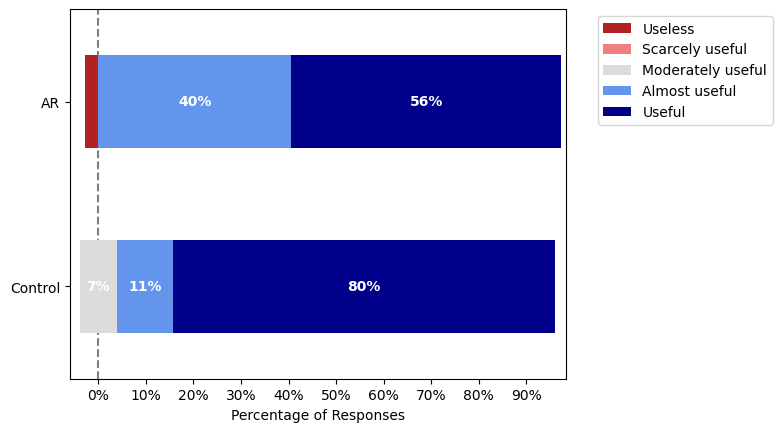

In [464]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Utility'],'Control':dataControlSuccess['Utility']}), utilityCat, bar_labels = True, plot_percentage=True)
plt.show()

In [431]:
stats.spearmanr(utility_pre_freq_tab['AR'], utility_pre_freq_tab['Control'])

SpearmanrResult(correlation=0.7999999999999999, pvalue=0.20000000000000007)

In [442]:
stats.mannwhitneyu(dataARSuccess['UtilityEncoded'], dataControlSuccess['UtilityEncoded'])


MannwhitneyuResult(statistic=745.5, pvalue=0.03641384282097642)

According to the Mann-Whitney U test, the evaluation of the utility from AR group were significantly different from those for Control Group (p=0.036).

Furthermore a unilateral Mann-Whitney U test assuming the alternative that Control group has a better evaluation of utility than AR group is also significant (p = 0.018)

### Perceived ability to reproduce alone 

<AxesSubplot: xlabel='ReprodAlone'>

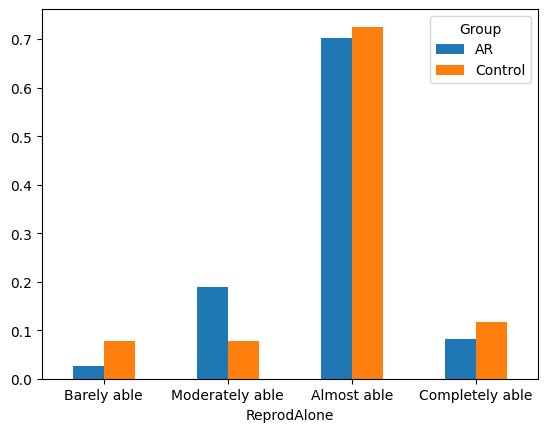

In [402]:
pd.crosstab(dataAllSuccess['ReprodAlone'], dataAllSuccess['Group'], normalize="columns").plot(kind="bar", rot=0, )

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


<AxesSubplot: xlabel='Percentage of Responses'>

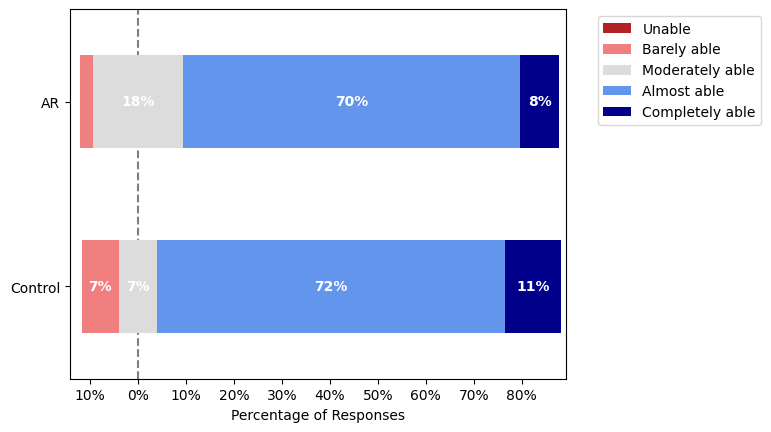

In [405]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['ReprodAlone'],'Control':dataControlSuccess['ReprodAlone']}), reprodAloneCat, bar_labels = True, plot_percentage=True)

In [403]:
pre_ability_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['ReprodAlone'] ,margins=False)
pre_ability_freq_tab

Group,AR,Control
ReprodAlone,,
Barely able,1,4
Moderately able,7,4
Almost able,26,37
Completely able,3,6


In [433]:
stats.mannwhitneyu(dataARSuccess['ReprodAloneEncoded'], dataControlSuccess['ReprodAloneEncoded'])

MannwhitneyuResult(statistic=877.0, pvalue=0.4821120850366546)

Notes: 78% of the particpants of the AR group feel able to reproduce the task in front of 83% particpants of  control group

### Perceived Need for explonation during formation

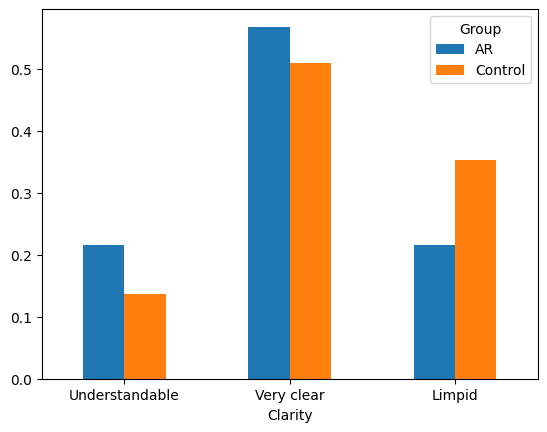

In [406]:
pd.crosstab(dataAllSuccess['Clarity'], dataAllSuccess['Group'], normalize="columns").plot(kind="bar", rot=0, )
plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


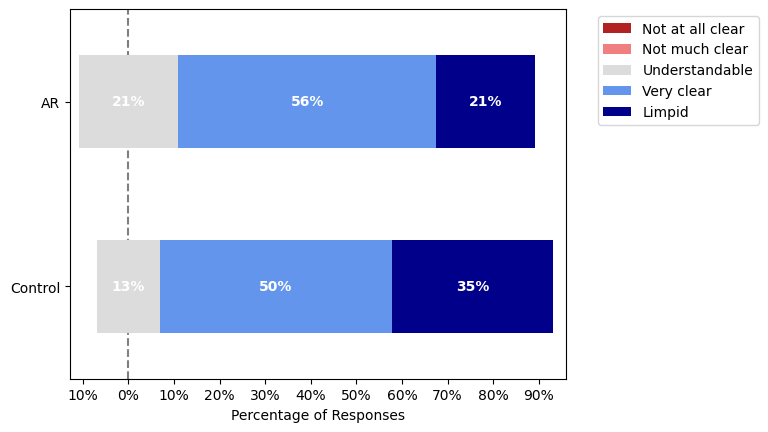

In [407]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Clarity'],'Control':dataControlSuccess['Clarity']}), clarityCat, bar_labels = True, plot_percentage=True)
plt.show()

Notes: 76% of the particpants of the AR group feel the instruction relatively clear in contrast to 85% for Control group participant

In [444]:
stats.mannwhitneyu(dataARSuccess['ClarityEncoded'], dataControlSuccess['ClarityEncoded'])

MannwhitneyuResult(statistic=784.0, pvalue=0.137031124576613)

In [447]:
stats.mannwhitneyu(dataARSuccess['ClarityEncoded'], dataControlSuccess['ClarityEncoded'], alternative="less")

MannwhitneyuResult(statistic=784.0, pvalue=0.0685155622883065)

### Perceived clarity of the instruction 

In [408]:
pd.crosstab(dataAllSuccess['ExplicaNeed'], dataAllSuccess['Group'], normalize="columns")

Group,AR,Control
ExplicaNeed,,
Never,0.027027,0.294118
Rarely,0.810811,0.509804
Sometimes,0.135135,0.176471
Often,0.027027,0.019608


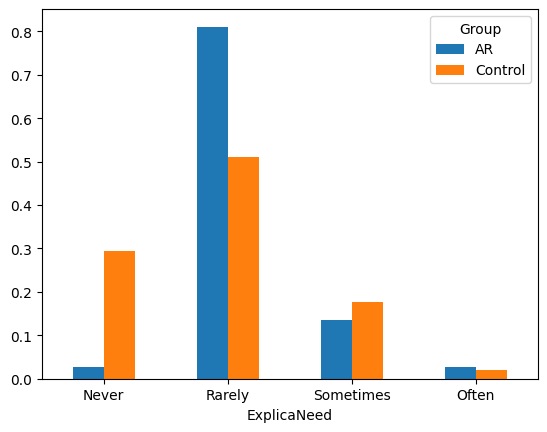

In [409]:
pd.crosstab(dataAllSuccess['ExplicaNeed'], dataAllSuccess['Group'], normalize="columns").plot(kind="bar", rot=0, )
plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


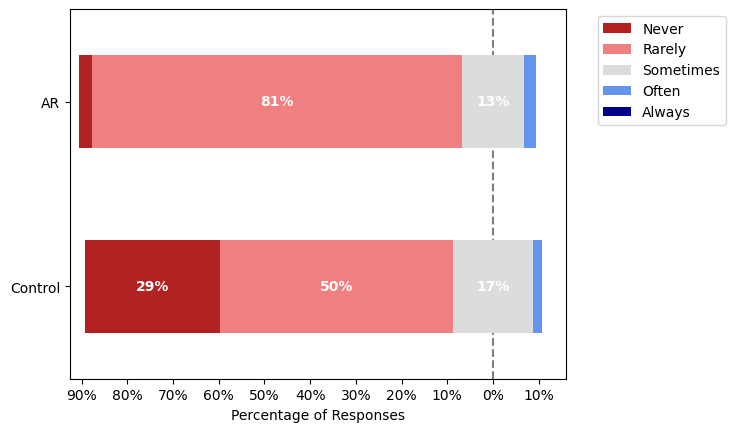

In [410]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['ExplicaNeed'],'Control':dataControlSuccess['ExplicaNeed']}), explicaNeedCat, bar_labels = True, plot_percentage=True)
plt.show()

Notes: 84% of the AR group participants didn't need additional explaination whereas 79% of the control group participant didn't need it

In [449]:
stats.mannwhitneyu(dataARSuccess['ExplicaNeedEncoded'], dataControlSuccess['ExplicaNeedEncoded'])

MannwhitneyuResult(statistic=1125.5, pvalue=0.07300711029872824)

In [451]:
print(f"AR explication need mean: {dataARSuccess['ExplicaNeedEncoded'].mean()}")
print(f"Control explication need mean: {dataControlSuccess['ExplicaNeedEncoded'].mean()}")

AR explication need mean: 2.1621621621621623
Control explication need mean: 1.9215686274509804


In [454]:
stats.mannwhitneyu(dataARSuccess['ExplicaNeedEncoded'], dataControlSuccess['ExplicaNeedEncoded'], alternative="greater")

MannwhitneyuResult(statistic=1125.5, pvalue=0.03650355514936412)

### Analysis of the percpetion of AR experience

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


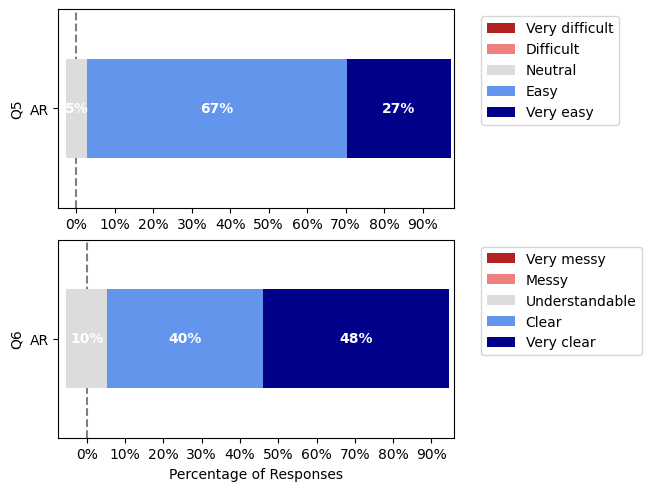

In [506]:
fig, axes = plt.subplots(nrows = 2, layout='constrained')
# fig = plt.figure(figsize=(12,12))

plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['EaseUsage']}), easeUsageCat, bar_labels = True, plot_percentage=True, ax = axes[0])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Structure']}), structureCat, bar_labels = True, plot_percentage=True, ax = axes[1])


for i in range(1):
     axes[i].set_xlabel('')

axes[0].set_ylabel('Q5')
axes[1].set_ylabel('Q6')

plt.show()

In [507]:
dataARSuccess['EaseUsage'].describe()

count       37
unique       3
top       Easy
freq        25
Name: EaseUsage, dtype: object

## Analysis of the after replication survey

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis '

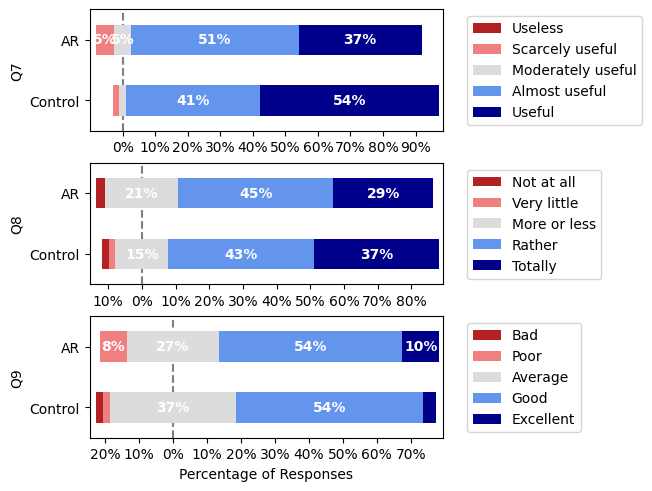

In [411]:
fig, axes = plt.subplots(nrows = 3, layout="constrained")

plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['UtilityAfterReprod'],'Control':dataControlSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[0])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Sufficient'],'Control':dataControlSuccess['Sufficient']}), sufficientCat, bar_labels = True, plot_percentage=True, ax = axes[1])
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['SelfPerformance'],'Control':dataControlSuccess['SelfPerformance']}), selfPerformanceCat, bar_labels = True, plot_percentage=True, ax = axes[2])


for i in range(2):
     axes[i].set_xlabel('')

axes[0].set_ylabel('Q7')
axes[1].set_ylabel('Q8')
axes[2].set_ylabel('Q9')

plt.show()

### Analyse of the perceived utility after reproduction

In [412]:
utility_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['UtilityAfterReprod'] ,margins=False, normalize='columns')
utility_freq_tab

Group,AR,Control
UtilityAfterReprod,,
Scarcely useful,0.054054,0.019608
Moderately useful,0.054054,0.019608
Almost useful,0.513514,0.411765
Useful,0.378378,0.549020


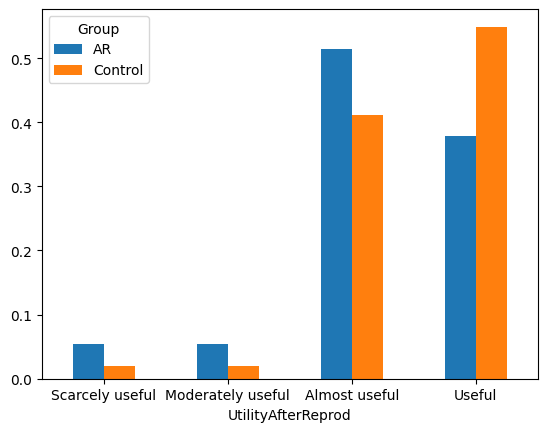

In [413]:
utility_freq_tab.plot(kind="bar", rot=0, )
plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Number of Responses'>

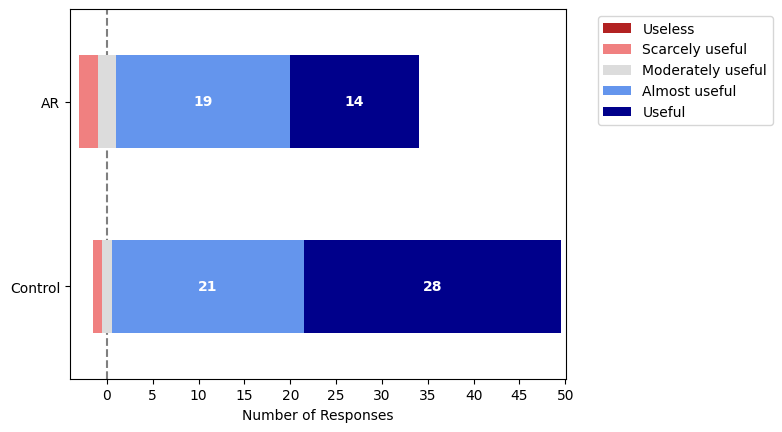

In [414]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['UtilityAfterReprod'],'Control':dataControlSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True)

In [456]:
# mann Withney U test for non parametric 
stats.mannwhitneyu(dataARSuccess['UtilityAfterReprodEncoded'], dataControlSuccess['UtilityAfterReprodEncoded'])

MannwhitneyuResult(statistic=759.5, pvalue=0.08238008111520442)

In [457]:
print(f"AR post evaluation utility mean: {dataARSuccess['UtilityAfterReprodEncoded'].mean()}")
print(f"Control post evaluation utility mean: {dataControlSuccess['UtilityAfterReprodEncoded'].mean()}")

AR post evaluation utility mean: 4.216216216216216
Control post evaluation utility mean: 4.490196078431373


In [458]:
stats.mannwhitneyu(dataARSuccess['UtilityAfterReprodEncoded'], dataControlSuccess['UtilityAfterReprodEncoded'], alternative="less")

MannwhitneyuResult(statistic=759.5, pvalue=0.04119004055760221)

### Analyse of the self sufficiency of the training to be able to operate the machine alone

In [416]:
sufficiency_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['Sufficient'] ,margins=False)
sufficiency_freq_tab

Group,AR,Control
Sufficient,,
Not at all,1,1
Very little,0,1
More or less,8,8
Rather,17,22
Totally,11,19


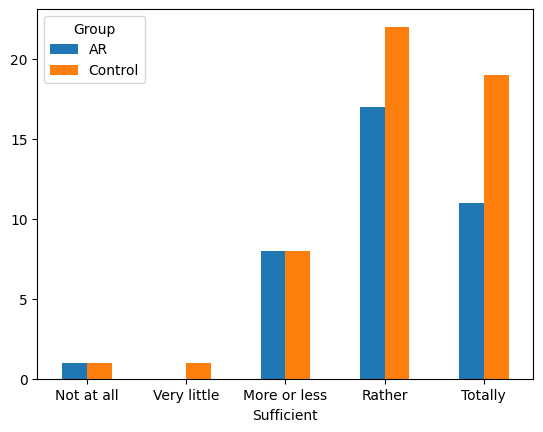

In [417]:
sufficiency_freq_tab.plot(kind="bar", rot=0, )
plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


<AxesSubplot: xlabel='Percentage of Responses'>

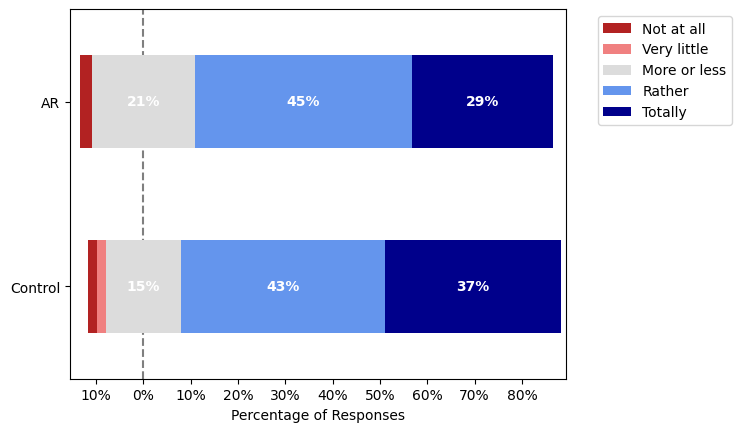

In [461]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['Sufficient'],'Control':dataControlSuccess['Sufficient']}), sufficientCat, bar_labels = True, plot_percentage=True)

In [459]:
# mann Withney U test for non parametric 
stats.mannwhitneyu(dataARSuccess['SufficientEncoded'], dataControlSuccess['SufficientEncoded'])

MannwhitneyuResult(statistic=862.0, pvalue=0.4622447273756206)

In [460]:
print(f"AR explication need mean: {dataARSuccess['ExplicaNeedEncoded'].mean()}")
print(f"Control explication need mean: {dataControlSuccess['ExplicaNeedEncoded'].mean()}")

AR explication need mean: 2.1621621621621623
Control explication need mean: 1.9215686274509804


### Analyse of the self evaluation of there performance while manipulating the machine as they learnt

In [420]:
perf_freq_tab = pd.crosstab(columns=dataAllSuccess['Group'], index=dataAllSuccess['SelfPerformance'] ,margins=False, )
perf_freq_tab

Group,AR,Control
SelfPerformance,,
Bad,0,1
Poor,3,1
Average,10,19
Good,20,28
Excellent,4,2


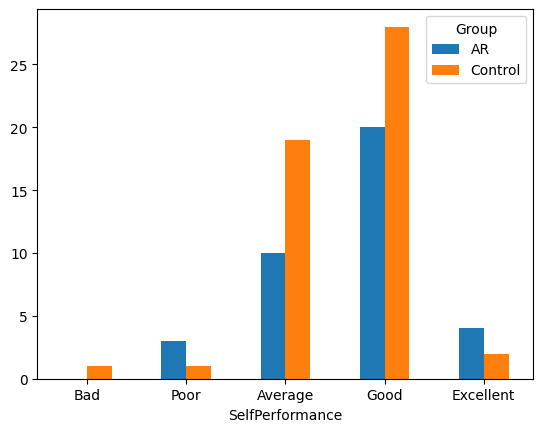

In [421]:
perf_freq_tab.plot(kind="bar", rot=0, )
plt.show()

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


<AxesSubplot: xlabel='Percentage of Responses'>

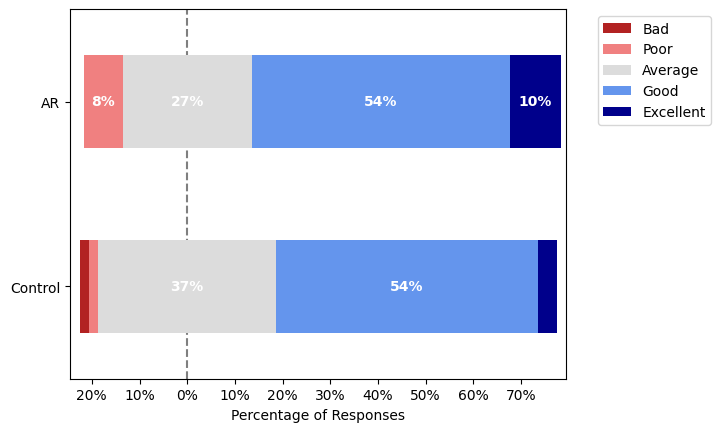

In [463]:
plot_likert.plot_likert(pd.DataFrame({'AR':dataARSuccess['SelfPerformance'],'Control':dataControlSuccess['SelfPerformance']}), selfPerformanceCat, bar_labels = True, plot_percentage=True)

In [462]:
stats.mannwhitneyu(dataARSuccess['SelfPerformanceEncoded'], dataControlSuccess['SelfPerformanceEncoded'])

MannwhitneyuResult(statistic=1019.5, pvalue=0.4759643731692479)

## Comparative utility before/after reproduction

Comparing AR group evaluation before and after evaluation session

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


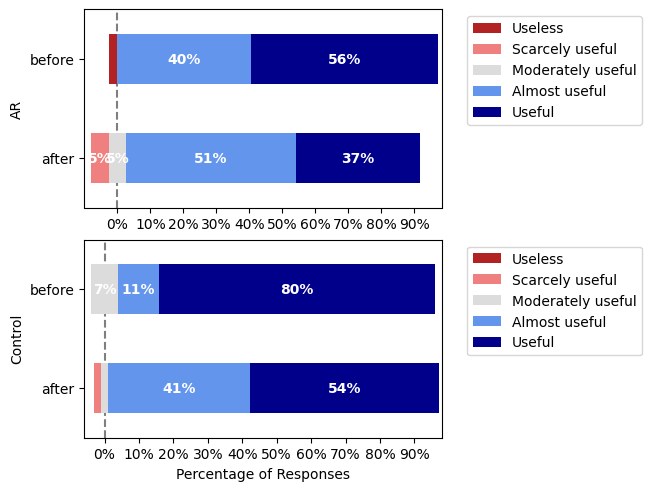

In [500]:
fig, axes = plt.subplots(nrows = 2, layout="constrained")

plot_likert.plot_likert(pd.DataFrame({'before':dataARSuccess['Utility'],'after':dataARSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[0])
plot_likert.plot_likert(pd.DataFrame({'before':dataControlSuccess['Utility'],'after':dataControlSuccess['UtilityAfterReprod']}), utilityCat, bar_labels = True, plot_percentage=True, ax = axes[1])

for i in range(1):
     axes[i].set_xlabel('')

axes[0].set_ylabel('AR')
axes[1].set_ylabel('Control')

plt.show()

In [477]:
stats.mannwhitneyu(dataARSuccess['UtilityEncoded'], dataARSuccess['UtilityAfterReprodEncoded'])

MannwhitneyuResult(statistic=832.5, pvalue=0.07412811267082572)

In [478]:
print(f"AR training utility before evaluation mean: {dataARSuccess['UtilityEncoded'].mean()}")
print(f"AR training utility after evaluation  mean: {dataARSuccess['UtilityAfterReprodEncoded'].mean()}")

AR training utility before evaluation mean: 4.486486486486487
AR training utility after evaluation  mean: 4.216216216216216


In [480]:
stats.mannwhitneyu(dataARSuccess['UtilityEncoded'], dataARSuccess['UtilityAfterReprodEncoded'], alternative="greater")

MannwhitneyuResult(statistic=832.5, pvalue=0.03706405633541286)

Comparing Control group evaluation before and after evaluation session

d:\Users\gabriel2\Documents\Projets\github-ERPI\Indico-LearningAnalysis\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Percentage of Responses'>

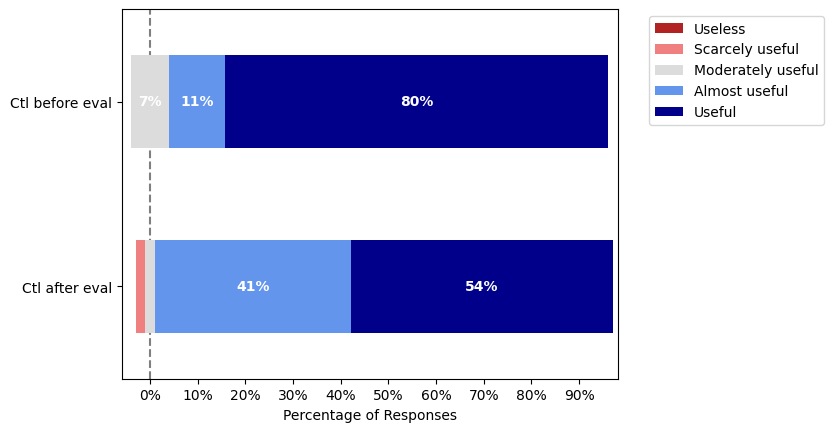

In [484]:
stats.mannwhitneyu(dataControlSuccess['UtilityEncoded'], dataControlSuccess['UtilityAfterReprodEncoded'], alternative="greater")

MannwhitneyuResult(statistic=1598.0, pvalue=0.007652467087312377)

## Comparative performance before/after reproduction

In [505]:
stats.mannwhitneyu(dataARSuccess['ReprodAloneEncoded'], dataARSuccess['SelfPerformanceEncoded'], alternative="greater")

MannwhitneyuResult(statistic=760.5, pvalue=0.17245727811069217)

In [502]:
stats.mannwhitneyu(dataControlSuccess['ReprodAloneEncoded'], dataControlSuccess['SelfPerformanceEncoded'], alternative="greater")

MannwhitneyuResult(statistic=1647.0, pvalue=0.003346485218528289)